## Coursera Machine Learning
### 2週目まで

- 最急降下法による線形回帰分析を実装してみた

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Dataset by (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)
train_data = pd.read_csv('data/train.tsv',sep='\\t')
test_data = pd.read_csv('data/test.tsv',sep='\\t')

# Objective variable
target = 'MEDV'
target_data = train_data[target]

/home/hikaru/anaconda3/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/home/hikaru/anaconda3/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Preprocessing

def drop_columns(df):
    drop_columns_list = []
    if target in df.columns:
        drop_columns_list.append(target)
    df = df.drop(drop_columns_list,axis = 1)
    return df

def to_onehot(df):
    dummies_columns_list = []
    df = pd.get_dummies(data = df, columns = dummies_columns_list)
    return df

def fill_nan(df):
    #df = df.fillna(0)
    #df = df.fillna(df.median())
    df = df.fillna(df.mean())
    return df

def add_first_column(df):
    first = pd.DataFrame({'FIRST' : np.array([1] * len(df),dtype='int32'),})
    df = pd.concat([first, df], axis=1)
    return df
def preprocessing(df):
    df = drop_columns(df)
    df = to_onehot(df)
    df = fill_nan(df)
    df = add_first_column(df)
    return df

df_train = preprocessing(train_data)

result 303.5431907894736
result 100.0808794197969
result 72.4889506556632
result 66.93376903225078
result 64.31312499954319
result 62.238585545539564
result 60.39665919236402
result 58.7328569280601
result 57.22629276015133
result 55.86158587913321
result 54.62524890576725
result 53.50512531653173
result 52.49021592736205
result 51.5705634538569
result 50.737153164380864
result 49.98182357715414
result 49.29718568930992
result 48.67654986074352
result 48.11385961959247
result 47.603631733149776
result 47.14090195105437
result 46.72117588386572
result 46.34038453095865
result 45.99484401768151
result 45.681219143373184
result 45.39649037954347
result 45.13792399165972
result 44.90304498889206
result 44.68961263415279
result 44.49559827209892
result 44.3191652557034
result 44.15865077276699
result 44.01254939254242
result 43.87949816966252
result 43.75826315797454
result 43.64772720083363
result 43.54687887703925
result 43.4548024930335
result 43.370669022332834
result 43.29372790253911


No handles with labels found to put in legend.


result 42.16549027741528


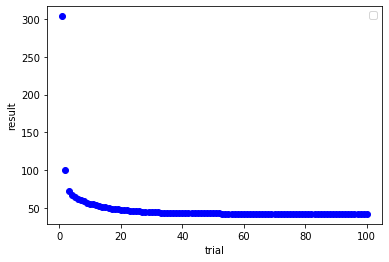

In [22]:
## Gradient Descent

### Train

alpha = 2/1000000 # 学習率
iteration = 100  # 試行回数

def calc_hypothesis(df, theta):
    result = 0
    for i in range(len(df)):
        result = result + df[i]* theta[i]
    return result
    
def hypothesis_velification(df, theta, target_data):
    seq = 0
    for i in range(len(df)):
        temp = calc_sequence(df.iloc[i], theta, target_data.iloc[i])
        seq = seq + temp * temp
    result = seq / (2 * len(df))
    print('result', result)
    return result

def gradient_descent(df_train, theta, target_data):
    res_theta = [0] * len(df_train.columns)
    for i in range(len(theta)):
        seq = 0
        for j in range(len(df_train)):
            temp = calc_sequence(df_train.iloc[j], theta, target_data.iloc[j]) * df_train.iloc[j][i]
            seq = seq + temp
        res = (alpha * seq / len(df_train))
        res_theta[i] = theta[i] - res
    return res_theta
    
def calc_sequence(df, theta, target_data):
    hypothesis = calc_hypothesis(df, theta)
    res = (hypothesis - target_data)
    return res
    
def training(df_train, theta, target_data):
    result = hypothesis_velification(df_train, theta, target_data)
    count = 1
    plt.plot(count , result,"o", color="b")
    best_theta = [0] * len(df_train.columns)
    temp = 0
    continue_train = True
    while(continue_train):
        temp = result 
        count = count + 1
        pre_result = result
        theta = gradient_descent(df_train, theta, target_data)
        result = hypothesis_velification(df_train, theta, target_data)
        plt.plot(count , result,"o", color="b")
        if (result < pre_result):
            best_theta = theta
            if (count >= iteration):
                break
        else:
            break
        
    plt.xlabel('trial')
    plt.ylabel('result')
    plt.legend()
    plt.show()
    return best_theta

theta = [0] * len(df_train.columns)  

theta = training(df_train, theta, target_data)

In [23]:
df_test = preprocessing(test_data)
target_data = test_data[target]

def test_calc(df_test, theta) :
    temp = 0
    for i in range(len(df_test)):
        result = calc_hypothesis(df_test.iloc[i], theta)
        print('result :', result)
        print('collect :', target_data[i])
        temp = temp + abs((result - target_data[i]) / result)
    mape = 100 / len(df_test) * temp
    print(f'result MAPE : {mape}%')
    
test_calc(df_test, theta)

result : 24.917758952542634
collect : 24.0
result : 24.75267382764303
collect : 21.6
result : 24.44045764560526
collect : 34.7
result : 24.518397447598723
collect : 33.4
result : 24.68867334709984
collect : 36.2
result : 24.536373860876747
collect : 28.7
result : 24.695295778474428
collect : 22.9
result : 24.88666106866579
collect : 27.1
result : 24.218152014539246
collect : 16.5
result : 24.215578344538528
collect : 18.9
result : 24.60135803710246
collect : 15.0
result : 24.850484476728372
collect : 18.9
result : 24.232625698677715
collect : 21.7
result : 24.603742474535718
collect : 20.4
result : 23.654949316512496
collect : 18.2
result : 24.497614387023116
collect : 19.9
result : 23.831717839059845
collect : 23.1
result : 24.038501125327546
collect : 17.5
result : 17.769072055153597
collect : 20.2
result : 24.25525398006816
collect : 18.2
result : 23.452928250178335
collect : 13.6
result : 24.435899682755363
collect : 19.6
result : 24.696248307365384
collect : 15.2
result : 24.58408